In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Used_Bikes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,32648.0,68295.417637,90718.595205,4400.0,25000.0,43000.0,80000.0,1900000.0
kms_driven,32648.0,26344.625184,22208.527695,1.0,12000.0,20373.0,35000.0,750000.0
age,32648.0,8.048211,4.031700,1.0,5.0,7.0,10.0,63.0
power,32648.0,213.511302,134.428868,100.0,150.0,150.0,220.0,1800.0


## Unique Values In Categorical Data

In [5]:
print(df['owner'].nunique())
print(df['city'].nunique())
print(df['brand'].nunique())

4
443
23


## Null Value Checking And Removal

In [6]:
(df.isnull()).sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

#### There are no null values present in this dataset

## Checking the Correlation of Various Features with Price

<AxesSubplot:>

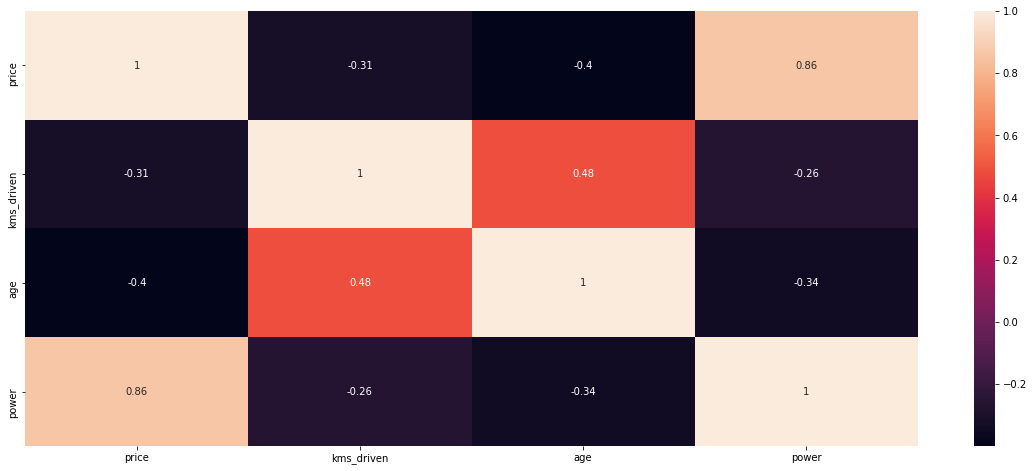

In [7]:
df_corr = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(df_corr , annot=True)

In [8]:
df_corr['price'].sort_values(ascending=False)

price         1.000000
power         0.862376
kms_driven   -0.313955
age          -0.399133
Name: price, dtype: float64

#### All columns are well correlated with the price column , so none are removed

In [9]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [10]:
name = df['bike_name'].value_counts()
name

Bajaj Pulsar 150cc                                   2776
Bajaj Avenger Street 220                             2531
Bajaj Avenger 220cc                                  2060
Royal Enfield Classic 350cc                          1673
Hero Passion Pro 100cc                               1432
                                                     ... 
Indian Chief Classic 1800cc                             1
TVS Apache RTR 160cc White Race Edition Rear Disc       1
Triumph Bonneville T100 900cc                           1
Bajaj CT110 ES Alloy                                    1
Yamaha FZS FI 150cc Special Edition                     1
Name: bike_name, Length: 471, dtype: int64

## Converting Features Into Lowercase

In [11]:
df['bike_name'] = df['bike_name'].str.strip()
df['bike_name'] = df['bike_name'].str.lower()

df['brand'] = df['brand'].str.strip()
df['brand'] = df['brand'].str.lower()

df['city'] = df['city'].str.strip()
df['city'] = df['city'].str.lower()

df['owner'] = df['owner'].str.strip()
df['owner'] = df['owner'].str.lower()

In [12]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,tvs star city plus dual tone 110cc,35000.0,ahmedabad,17654.0,first owner,3.0,110.0,tvs
1,royal enfield classic 350cc,119900.0,delhi,11000.0,first owner,4.0,350.0,royal enfield
2,triumph daytona 675r,600000.0,delhi,110.0,first owner,8.0,675.0,triumph
3,tvs apache rtr 180cc,65000.0,bangalore,16329.0,first owner,4.0,180.0,tvs
4,yamaha fz s v 2.0 150cc-ltd. edition,80000.0,bangalore,10000.0,first owner,3.0,150.0,yamaha


## Spliting Brand Names Into Its Component Words

In [13]:
names_split = []
for i in range(df.shape[0]):
    val = df['bike_name'][i].split()
    names_split.append(val)

In [14]:
names_split

[['tvs', 'star', 'city', 'plus', 'dual', 'tone', '110cc'],
 ['royal', 'enfield', 'classic', '350cc'],
 ['triumph', 'daytona', '675r'],
 ['tvs', 'apache', 'rtr', '180cc'],
 ['yamaha', 'fz', 's', 'v', '2.0', '150cc-ltd.', 'edition'],
 ['yamaha', 'fzs', '150cc'],
 ['honda', 'cb', 'hornet', '160r', 'abs', 'dlx'],
 ['hero', 'splendor', 'plus', 'self', 'alloy', '100cc'],
 ['royal', 'enfield', 'thunderbird', 'x', '350cc'],
 ['royal', 'enfield', 'classic', 'desert', 'storm', '500cc'],
 ['yamaha', 'yzf-r15', '2.0', '150cc'],
 ['yamaha', 'fz25', '250cc'],
 ['bajaj', 'pulsar', 'ns200'],
 ['bajaj', 'discover', '100m'],
 ['bajaj', 'discover', '125m'],
 ['bajaj', 'pulsar', 'ns200', 'abs'],
 ['bajaj', 'pulsar', 'rs200', 'abs'],
 ['suzuki', 'gixxer', 'sf', '150cc'],
 ['benelli', '302r', '300cc'],
 ['bajaj', 'discover', '125m'],
 ['bajaj', 'pulsar', 'rs200', 'abs'],
 ['suzuki', 'gixxer', 'sf', '150cc'],
 ['hero', 'splendor', 'ismart', 'plus', 'ibs', '110cc'],
 ['royal', 'enfield', 'classic', 'chrome', 

In [15]:
brand_split = []
for i in range(df.shape[0]):
    val = df['brand'][i].split()
    brand_split.append(val)

## Brand Length Calculation And Removal Of Brand Name From Model Name

In [16]:
brand_length = []
for i in range(df.shape[0]):
    val = np.array(brand_split[i])
    brand_length.append(val.shape[0])

In [17]:
bike_version = []
for i in range(df.shape[0]):
    j = brand_length[i]
    val = names_split[i][j:]
    bike_version.append(val)

In [18]:
for i in range(df.shape[0]):
    bike_version[i] = ' '.join(bike_version[i])

In [19]:
df.drop('bike_name', inplace=True, axis=1)

In [20]:
df['Bike_model'] = bike_version
df.head()

,price,city,kms_driven,owner,age,power,brand,Bike_model
0,35000.0,ahmedabad,17654.0,first owner,3.0,110.0,tvs,star city plus dual tone 110cc
1,119900.0,delhi,11000.0,first owner,4.0,350.0,royal enfield,classic 350cc
2,600000.0,delhi,110.0,first owner,8.0,675.0,triumph,daytona 675r
3,65000.0,bangalore,16329.0,first owner,4.0,180.0,tvs,apache rtr 180cc
4,80000.0,bangalore,10000.0,first owner,3.0,150.0,yamaha,fz s v 2.0 150cc-ltd. edition


## Renaming Bike Brands Having Less No. Of Bikes

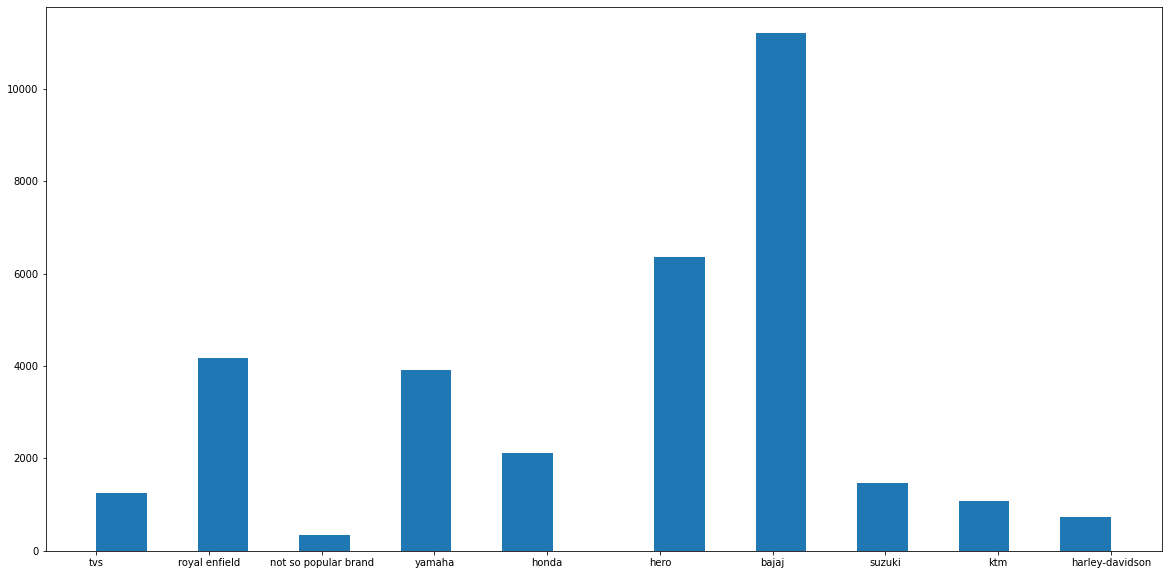

In [21]:
brands = df['brand'].value_counts()
bike_less_than_500 = brands[brands<=500]
bike_less_than_500

columns = bike_less_than_500.keys()
columns

df['brand'].replace(columns,"not so popular brand",inplace=True)

df['brand'].value_counts()

plt.figure(figsize=(20,10))
plt.hist(df['brand'],bins=20)
plt.show()

In [22]:
df.head()

,price,city,kms_driven,owner,age,power,brand,Bike_model
0,35000.0,ahmedabad,17654.0,first owner,3.0,110.0,tvs,star city plus dual tone 110cc
1,119900.0,delhi,11000.0,first owner,4.0,350.0,royal enfield,classic 350cc
2,600000.0,delhi,110.0,first owner,8.0,675.0,not so popular brand,daytona 675r
3,65000.0,bangalore,16329.0,first owner,4.0,180.0,tvs,apache rtr 180cc
4,80000.0,bangalore,10000.0,first owner,3.0,150.0,yamaha,fz s v 2.0 150cc-ltd. edition


## Renaming Bike Model With Less Value Count

In [23]:
Bike_model = df['Bike_model'].value_counts()

model_less_than_500 = Bike_model[Bike_model<=500]

columns = model_less_than_500.keys()

df['Bike_model'].replace(columns,"not so popular model",inplace=True)

df['Bike_model'].value_counts()

not so popular model    6634
pulsar 150cc            2776
avenger street 220      2531
avenger 220cc           2060
classic 350cc           1673
passion pro 100cc       1432
passion 100cc           1238
thunderbird 350cc        919
yzf-r15 2.0 150cc        769
bullet electra 350cc     756
pulsar ns200             708
rc 390cc                 705
dominar 400 abs          700
cd deluxe 100cc          693
cbz xtreme 150cc         686
platina 100cc            686
cb trigger 150cc         681
apache rtr 180cc         675
fazer 150cc              674
fz 150cc                 661
super splendor 125cc     649
cb hornet 160r std       641
street 750 abs           631
hunk rear disc 150cc     619
slingshot plus 125cc     617
fazer 25 250cc           613
sz-rr 150cc              613
zeus 125cc               608
Name: Bike_model, dtype: int64

## Renaming Cities With Less Bikes As Other Cities

In [24]:
city_counts = df['city'].value_counts()
city_counts[~(city_counts<500)]

delhi                  7318
bangalore              2723
mumbai                 2591
hyderabad              2160
pune                   1724
chennai                1619
lucknow                1294
jaipur                 1007
ghaziabad               938
ahmedabad               905
noida                   776
bhopal                  651
gautam buddha nagar     649
kanchipuram             640
jodhpur                 635
karnal                  625
rupnagar                621
allahabad               621
gurgaon                 617
godhara                 611
faridabad               609
kadapa                  608
perumbavoor             608
Name: city, dtype: int64

In [25]:
other_cities = city_counts[city_counts<500]
df['city'].replace(other_cities.keys(),'other',inplace=True)

In [26]:
city_counts

delhi            7318
bangalore        2723
mumbai           2591
hyderabad        2160
pune             1724
                 ... 
surendranagar       1
khandela            1
mohammadabad        1
shimla              1
sidhi               1
Name: city, Length: 443, dtype: int64

In [27]:
(df['city'].str.contains('other')).sum()

2098

## Renaming Bikes Having Two Or More Owners

In [28]:
df['owner'].value_counts()

first owner             29964
second owner             2564
third owner               108
fourth owner or more       12
Name: owner, dtype: int64

In [29]:
df['owner'].replace(['second owner','third owner','fourth owner or more'],'second owner or more',inplace=True)
df['owner'].value_counts()

first owner             29964
second owner or more     2684
Name: owner, dtype: int64

In [30]:
df.sample(n=10)

,price,city,kms_driven,owner,age,power,brand,Bike_model
2126,670000.0,other,1210.0,first owner,5.0,883.0,harley-davidson,not so popular model
28739,70000.0,mumbai,13858.0,second owner or more,11.0,350.0,royal enfield,thunderbird 350cc
20684,48000.0,allahabad,41939.0,first owner,8.0,200.0,bajaj,pulsar ns200
10537,18000.0,hyderabad,3869.0,first owner,16.0,100.0,hero,passion 100cc
9676,22000.0,pune,60857.0,first owner,13.0,150.0,bajaj,pulsar 150cc
9001,125000.0,chennai,13500.0,first owner,7.0,500.0,royal enfield,not so popular model
30772,70000.0,mumbai,13858.0,second owner or more,11.0,350.0,royal enfield,thunderbird 350cc
17186,105000.0,delhi,20000.0,first owner,4.0,350.0,royal enfield,bullet electra 350cc
15725,48000.0,allahabad,41939.0,first owner,8.0,200.0,bajaj,pulsar ns200
17559,450000.0,jodhpur,3430.0,first owner,4.0,750.0,harley-davidson,street 750 abs


## Average Features For Different Brands 

In [31]:
group = df.groupby(['brand'])
def average_per_brand(col,scale=None):
    brands = df['brand'].unique()
    avgs = []
    for brand in brands:
        average = group.get_group(brand)[col].mean()
        avgs.append(average)
    df1 = pd.DataFrame({"Brand":brands,f"Average {col}":avgs})
    
    x = df1[df1.columns[1]]
    y = df1[df1.columns[0]]
    plt.figure(figsize=(18,6))
    plt.bar(y,x)
    plt.title(f"Average {col} of various brands")
    plt.ylabel(col)
    plt.show()

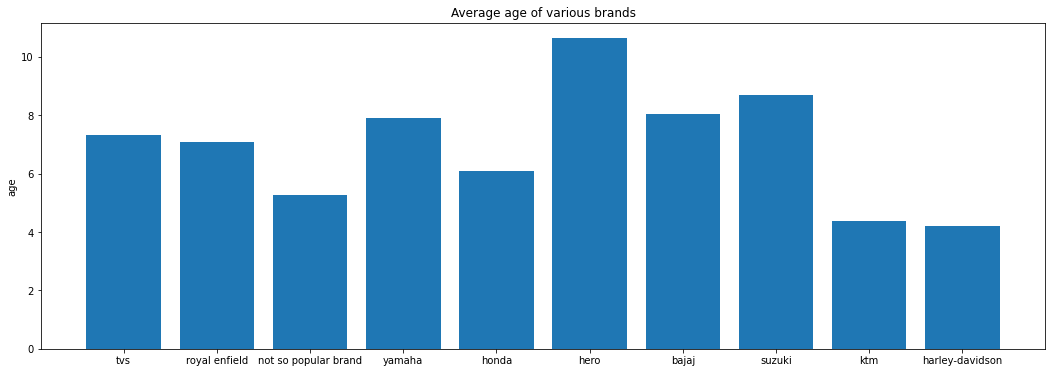

In [32]:
average_per_brand('age')

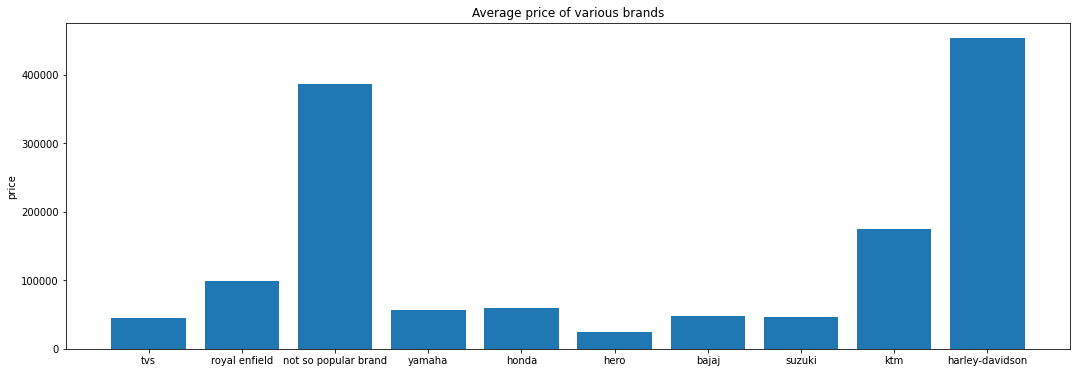

In [33]:
average_per_brand('price')

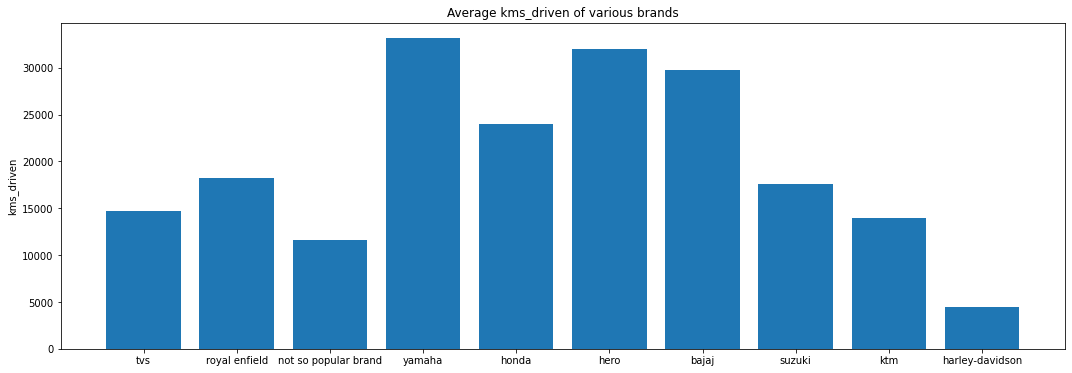

In [34]:
average_per_brand('kms_driven')

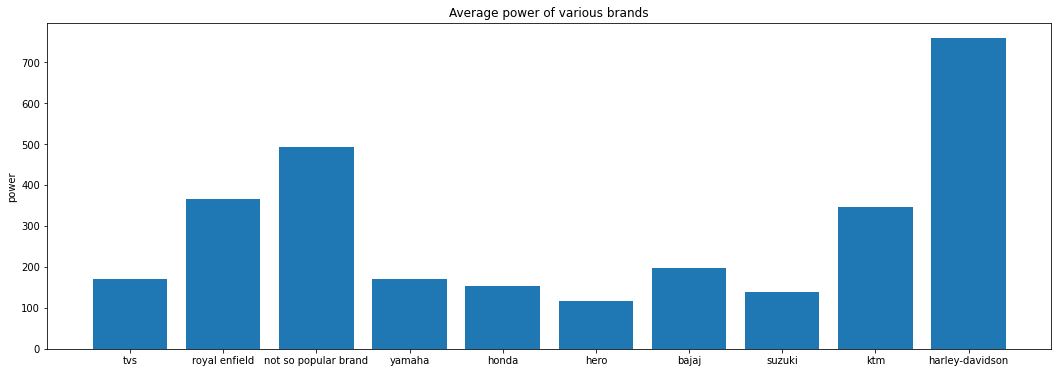

In [35]:
average_per_brand('power')

## Outlier Removal

In [36]:
numerical_cols = np.array(['price','kms_driven','age','power'])

In [37]:
numerical_cols[1]

'kms_driven'

In [38]:
def outlier_removal(df,col):
    m = df[col].mean()
    st = df[col].std()
    
    a = m - 2*st
    b = m + 2*st
    df = df[(df[col] >= m-2*st) & (df[col] <= m+2*st)]
    print('Outliers from "{}" are removed\n'.format(col))
    df[col].hist()
    return df

In [39]:
df.shape

(32648, 8)

Outliers from "kms_driven" are removed



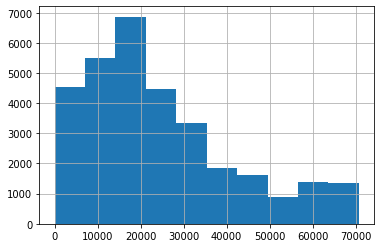

In [40]:
df_new = outlier_removal(df,numerical_cols[1])

Outliers from "age" are removed



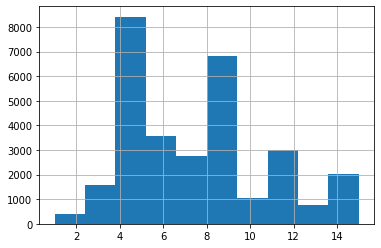

In [41]:
df_new = outlier_removal(df_new,numerical_cols[2])

Outliers from "power" are removed



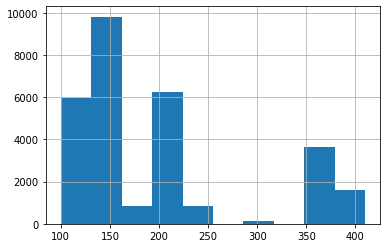

In [42]:
df_new = outlier_removal(df_new,numerical_cols[3])

In [43]:
df_new.describe()

,price,kms_driven,age,power
count,2.910900e+04,29109.000000,29109.000000,29109.000000
mean,5.756198e+04,25456.672438,7.541688,198.903775
std,4.329741e+04,17096.890127,3.275614,87.835344
min,5.800000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,13216.000000,5.000000,150.000000
50%,4.460000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,34968.000000,9.000000,220.000000
max,1.100000e+06,70756.000000,15.000000,410.000000


In [44]:
df_new.shape

(29109, 8)

In [45]:
df_new.head(n=5)

,price,city,kms_driven,owner,age,power,brand,Bike_model
0,35000.0,ahmedabad,17654.0,first owner,3.0,110.0,tvs,not so popular model
1,119900.0,delhi,11000.0,first owner,4.0,350.0,royal enfield,classic 350cc
3,65000.0,bangalore,16329.0,first owner,4.0,180.0,tvs,apache rtr 180cc
4,80000.0,bangalore,10000.0,first owner,3.0,150.0,yamaha,not so popular model
5,53499.0,delhi,25000.0,first owner,6.0,150.0,yamaha,not so popular model


# Data Preparation for Price Prediction

## Using Label Encoding

In [46]:
df_new

,price,city,kms_driven,owner,age,power,brand,Bike_model
0,35000.0,ahmedabad,17654.0,first owner,3.0,110.0,tvs,not so popular model
1,119900.0,delhi,11000.0,first owner,4.0,350.0,royal enfield,classic 350cc
3,65000.0,bangalore,16329.0,first owner,4.0,180.0,tvs,apache rtr 180cc
4,80000.0,bangalore,10000.0,first owner,3.0,150.0,yamaha,not so popular model
5,53499.0,delhi,25000.0,first owner,6.0,150.0,yamaha,not so popular model
...,...,...,...,...,...,...,...,...
32641,41000.0,delhi,20245.0,second owner or more,11.0,220.0,bajaj,avenger 220cc
32643,39000.0,delhi,22000.0,first owner,4.0,100.0,hero,passion pro 100cc
32644,30000.0,karnal,6639.0,first owner,9.0,180.0,tvs,apache rtr 180cc
32645,60000.0,delhi,20373.0,first owner,6.0,220.0,bajaj,avenger street 220


In [47]:
df_new['Bike_model'] = df_new['Bike_model'].str.strip()
df_new['Bike_model'] = df_new['Bike_model'].str.lower()

df_new['city'] = df_new['city'].str.strip()
df_new['city'] = df_new['city'].str.lower()

In [48]:
df_new.head(n=5)

,price,city,kms_driven,owner,age,power,brand,Bike_model
0,35000.0,ahmedabad,17654.0,first owner,3.0,110.0,tvs,not so popular model
1,119900.0,delhi,11000.0,first owner,4.0,350.0,royal enfield,classic 350cc
3,65000.0,bangalore,16329.0,first owner,4.0,180.0,tvs,apache rtr 180cc
4,80000.0,bangalore,10000.0,first owner,3.0,150.0,yamaha,not so popular model
5,53499.0,delhi,25000.0,first owner,6.0,150.0,yamaha,not so popular model


In [49]:
df_labeled = pd.DataFrame()
categorical_columns = np.array(['city','owner','brand','Bike_model'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(4):
    df_labeled[categorical_columns[i]] = le.fit_transform(df_new.loc[: , categorical_columns[i]])

In [50]:
df_labeled.head(n=5)

,city,owner,brand,Bike_model
0,0,0,8,14
1,5,0,6,8
2,2,0,8,0
3,2,0,9,14
4,5,0,9,14


In [51]:
df_num = df_new[numerical_cols]
df_num = df_num.set_index(keys=np.arange(29109))

df_num.head(n=5)

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,65000.0,16329.0,4.0,180.0
3,80000.0,10000.0,3.0,150.0
4,53499.0,25000.0,6.0,150.0


In [52]:
df_labeled = pd.concat((df_num,df_labeled),axis='columns')
df_labeled.head(n=5)

,price,kms_driven,age,power,city,owner,brand,Bike_model
0,35000.0,17654.0,3.0,110.0,0,0,8,14
1,119900.0,11000.0,4.0,350.0,5,0,6,8
2,65000.0,16329.0,4.0,180.0,2,0,8,0
3,80000.0,10000.0,3.0,150.0,2,0,9,14
4,53499.0,25000.0,6.0,150.0,5,0,9,14


In [53]:
data = df_labeled.values

In [54]:
X = data[: , 1:]
Y = data[: , 0]

In [55]:
X

array([[1.7654e+04, 3.0000e+00, 1.1000e+02, ..., 0.0000e+00, 8.0000e+00,
        1.4000e+01],
       [1.1000e+04, 4.0000e+00, 3.5000e+02, ..., 0.0000e+00, 6.0000e+00,
        8.0000e+00],
       [1.6329e+04, 4.0000e+00, 1.8000e+02, ..., 0.0000e+00, 8.0000e+00,
        0.0000e+00],
       ...,
       [6.6390e+03, 9.0000e+00, 1.8000e+02, ..., 0.0000e+00, 8.0000e+00,
        0.0000e+00],
       [2.0373e+04, 6.0000e+00, 2.2000e+02, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [6.0857e+04, 1.3000e+01, 1.5000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.8000e+01]])

In [56]:
Y

array([ 35000., 119900.,  65000., ...,  30000.,  60000.,  22000.])

### Splitting Data Into Train Test Data

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
xtrain ,xtest ,ytrain , ytest = train_test_split(X,Y,test_size=0.3)

In [59]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(20376, 7) (20376,) (8733, 7) (8733,)


### Scaling Data Before Modelling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [61]:
print("Mean and Standard deviation of scaled train data is : ",xtrain.mean(), xtrain.std())
print("Mean and Standard deviation of scaled test data is : ",xtrain.mean(), xtrain.std())

Mean and Standard deviation of scaled train data is :  -3.8956504807083847e-17 1.0000000000000207
Mean and Standard deviation of scaled test data is :  -3.8956504807083847e-17 1.0000000000000207


### Polynomial Transformation

In [62]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(4,include_bias=False)

In [63]:
pol.fit(xtrain)

PolynomialFeatures(degree=4, include_bias=False)

In [64]:
xtrain_pol = pol.transform(xtrain)
xtest_pol = pol.transform(xtest)

In [65]:
xtest_pol

array([[-0.19930099, -1.07946727, -1.1265549 , ...,  0.04809047,
        -0.06630747,  0.0914252 ],
       [ 0.21669241, -0.16584195,  0.23958383, ...,  2.22011994,
         3.35058044,  5.05665891],
       [ 0.21669241, -0.16584195,  0.23958383, ...,  2.22011994,
         3.35058044,  5.05665891],
       ...,
       [-0.93402442, -0.47038372, -0.55733043, ...,  0.07554539,
        -0.02103136,  0.005855  ],
       [-1.09729629, -0.77492549,  0.23958383, ...,  1.83398787,
         2.51564921,  3.45067218],
       [-0.31592376, -1.07946727,  1.71956745, ...,  0.94050758,
        -1.45841159,  2.26150688]])

### Prediction On A Linear Model

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [67]:
model.fit(xtrain_pol,ytrain)

LinearRegression()

In [68]:
train_pred = model.predict(xtrain_pol)
test_pred = model.predict(xtest_pol)

In [69]:
print(model.intercept_)
print(model.coef_)

26559330398970.574
[-7.13737482e+08 -5.84300893e+13 -3.87877123e+14 -6.98424458e+13
  1.75680662e+14  2.10676104e+14  3.10466399e+14 -6.02913228e+13
  1.90237766e+13  7.39460914e+13 -1.46591722e+12  6.21664075e+13
  2.83436073e+13 -4.33047333e+13 -1.14553807e+13  5.81759328e+13
  6.39944926e+12 -2.19058117e+14  5.47335441e+12 -3.71342347e+13
 -2.75100346e+14 -3.51315173e+12 -1.51347289e+15 -1.77319667e+13
 -1.17667516e+13  4.90837418e+13 -3.20978857e+14 -1.19358661e+13
 -2.71508085e+13  2.85572240e+14  7.86084705e+14  1.16126457e+15
  1.87058195e+12  8.03355110e+12 -1.36797092e+12 -2.07140625e+02
 -8.52843750e+02  9.42781250e+02  5.44687500e+02 -2.09418765e+14
  8.38781250e+02  3.18283203e+03  8.23421875e+02  1.12422656e+03
 -2.33839844e+02  6.60780956e+13 -6.57031250e+01 -1.40206348e+03
  1.88440625e+03  1.31087500e+03  2.56847891e+14  2.07992188e+02
 -5.22132812e+02 -1.69346875e+03 -5.09178699e+12  1.48131250e+03
  1.84812500e+03  2.15941098e+14  9.84500413e+13 -1.50416732e+14
  5.10

In [70]:
print("Accuracy for training data is : ",model.score(xtrain_pol,ytrain))
print("Accuracy for testing data is : ",model.score(xtest_pol,ytest))

Accuracy for training data is :  0.9310129079322129
Accuracy for testing data is :  0.8730206182519054


In [71]:
train_actual = ytrain.reshape((-1,1))
train_pred = train_pred.reshape((-1,1))

In [72]:
test_actual = ytest.reshape((-1,1))
test_pred = test_pred.reshape((-1,1))

In [73]:
actual_vs_prediction_train = np.hstack((train_actual,train_pred.round()))
actual_vs_prediction_train

array([[ 49000.,  92516.],
       [ 30000.,  30251.],
       [ 95500.,  91278.],
       ...,
       [ 70000.,  69982.],
       [ 80000.,  70393.],
       [ 90000., 147431.]])

In [74]:
actual_vs_prediction_test = np.hstack((test_actual,test_pred.round()))
actual_vs_prediction_test

array([[ 39000.,  38218.],
       [ 50000.,  50367.],
       [ 50000.,  50367.],
       ...,
       [ 62000.,  50090.],
       [ 55005.,  64074.],
       [105000., 105059.]])

In [75]:
mae_train = (abs(train_actual - train_pred)).mean()

In [76]:
mae_train

4332.0699846786665

In [77]:
mae_test = (abs(test_actual - test_pred)).mean()

In [78]:
mae_test

4489.650122022787

In [79]:
df_labeled['price'].mean()

57561.975780686385

## Using One Hot Encoding

In [80]:
df_new.columns

Index(['price', 'city', 'kms_driven', 'owner', 'age', 'power', 'brand',
       'Bike_model'],
      dtype='object')

In [81]:
numerical_cols

array(['price', 'kms_driven', 'age', 'power'], dtype='<U10')

In [82]:
categorical_columns

array(['city', 'owner', 'brand', 'Bike_model'], dtype='<U10')

In [83]:
df0 = pd.get_dummies(df_new[categorical_columns[0]])
df1 = pd.get_dummies(df_new[categorical_columns[1]])
df2 = pd.get_dummies(df_new[categorical_columns[2]])
df3 = pd.get_dummies(df_new[categorical_columns[3]])

In [84]:
df_encoded = pd.concat((df_new.loc[: , numerical_cols],df0,df1,df2,df3),axis='columns')

In [85]:
# df_encoded.columns

In [86]:
df_encoded.sample(n=5)

,price,kms_driven,age,power,ahmedabad,allahabad,bangalore,bhopal,chennai,delhi,...,platina 100cc,pulsar 150cc,pulsar ns200,rc 390cc,slingshot plus 125cc,super splendor 125cc,sz-rr 150cc,thunderbird 350cc,yzf-r15 2.0 150cc,zeus 125cc
10629,20000.0,52000.0,10.0,150.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25388,139000.0,21300.0,4.0,400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20735,23000.0,20000.0,6.0,100.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19089,50000.0,29134.0,7.0,220.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17601,32000.0,22697.0,7.0,125.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [87]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
price,29109.0,57561.975781,43297.414373,5800.0,25000.0,44600.0,80000.0,1100000.0
kms_driven,29109.0,25456.672438,17096.890127,1.0,13216.0,20373.0,34968.0,70756.0
age,29109.0,7.541688,3.275614,1.0,5.0,7.0,9.0,15.0
power,29109.0,198.903775,87.835344,100.0,150.0,150.0,220.0,410.0
ahmedabad,29109.0,0.029750,0.169900,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
super splendor 125cc,29109.0,0.001340,0.036579,0.0,0.0,0.0,0.0,1.0
sz-rr 150cc,29109.0,0.021059,0.143583,0.0,0.0,0.0,0.0,1.0
thunderbird 350cc,29109.0,0.031021,0.173378,0.0,0.0,0.0,0.0,1.0
yzf-r15 2.0 150cc,29109.0,0.026384,0.160276,0.0,0.0,0.0,0.0,1.0


In [88]:
df_encoded.shape

(29109, 66)

### Model Selection And Prediction On One Hot Encoded Data

In [89]:
df_encoded.set_index(np.arange(29109),inplace=True)
df_encoded

,price,kms_driven,age,power,ahmedabad,allahabad,bangalore,bhopal,chennai,delhi,...,platina 100cc,pulsar 150cc,pulsar ns200,rc 390cc,slingshot plus 125cc,super splendor 125cc,sz-rr 150cc,thunderbird 350cc,yzf-r15 2.0 150cc,zeus 125cc
0,35000.0,17654.0,3.0,110.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,119900.0,11000.0,4.0,350.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,65000.0,16329.0,4.0,180.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80000.0,10000.0,3.0,150.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53499.0,25000.0,6.0,150.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29104,41000.0,20245.0,11.0,220.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29105,39000.0,22000.0,4.0,100.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29106,30000.0,6639.0,9.0,180.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29107,60000.0,20373.0,6.0,220.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
np.where(df_encoded.columns == 'ahmedabad')[0][0] 

4

In [91]:
data_encoded = df_encoded.values
X_1 = data_encoded[: , 1:]
Y_1 = data_encoded[: , 0]

from sklearn.model_selection import train_test_split, cross_val_score
XT ,Xt ,YT , Yt = train_test_split(X_1,Y_1,test_size=0.3)

### Model Selection

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lmodel = LinearRegression()
rmodel = RandomForestRegressor(n_estimators=50,random_state=2,min_samples_split=3)

In [93]:
# from sklearn.preprocessing import PolynomialFeatures
# pol = PolynomialFeatures(2,include_bias=False)
# pol.fit(XT)

In [94]:
# XT_pol = pol.transform(XT)
# Xt_pol = pol.transform(Xt)

In [95]:
lmodel.fit(XT,YT)
rmodel.fit(XT,YT)

RandomForestRegressor(min_samples_split=3, n_estimators=50, random_state=2)

In [96]:
print("The accuracy for train data of Linear Regression Model is : ",lmodel.score(XT,YT))
print("The accuracy for train data of Random Forest Regressor Model is: ",rmodel.score(XT,YT))

The accuracy for train data of Linear Regression Model is :  0.9362095209023363
The accuracy for train data of Random Forest Regressor Model is:  0.99118547838396


In [97]:
print("The accuracy for test data of Linear Regression Model is : ",lmodel.score(Xt,Yt))
print("The accuracy for test data of Random Forest Regressor Model is : ",rmodel.score(Xt,Yt))

The accuracy for test data of Linear Regression Model is :  0.9043871491516254
The accuracy for test data of Random Forest Regressor Model is :  0.9392899183841954


#### Here, Linear model is performing better for both train and test cases as well as not overfitting like Random forest regressor model.
#### Hence, we go ahead with linear model and give prediction on it

In [98]:
train_prediction = lmodel.predict(XT)
train_prediction

array([96502.23801843, 19273.85888624, 26050.18829316, ...,
       86773.87399132, 31931.48416674, 86773.87399132])

In [99]:
test_prediction = lmodel.predict(Xt)
test_prediction

array([ 25000.00000079,  86773.87399132,  55102.57166329, ...,
       123000.00000013, 192209.82149975,  47999.99999899])

In [100]:
actual_vs_prediction_train = np.hstack((YT.reshape(-1,1),train_prediction.reshape(-1,1).round()))

In [101]:
actual_vs_prediction_train

array([[95500., 96502.],
       [22000., 19274.],
       [26000., 26050.],
       ...,
       [87000., 86774.],
       [32000., 31931.],
       [87000., 86774.]])

In [102]:
actual_vs_prediction_test = np.hstack((Yt.reshape(-1,1),test_prediction.reshape(-1,1).round()))

In [103]:
actual_vs_prediction_test

array([[ 25000.,  25000.],
       [ 87000.,  86774.],
       [ 55005.,  55103.],
       ...,
       [123000., 123000.],
       [196700., 192210.],
       [ 48000.,  48000.]])

In [104]:
mae_train = (abs(YT - train_prediction).mean())
mae_train

4681.4075283004095

In [105]:
mae_test = (abs(Yt - test_prediction).mean())
mae_test

4965.853013861924

In [106]:
df_encoded['price'].mean()

57561.975780686385

#### The mean absolute error of one hot encoded data is comparable to the label encoded data . Here, we use one hot encoded data for our model deployment

### Sending Predictions to .csv File

In [107]:
train_csv = pd.DataFrame(actual_vs_prediction_train)
train_csv.columns = ["Actual Price","Predicted Price"]
train_csv.to_csv("train_data_predictions.csv",index=False)
train_csv.sample(n=5)

,Actual Price,Predicted Price
1865,11900.0,11634.0
17854,24700.0,26223.0
20371,57000.0,59090.0
11523,37500.0,30236.0
13392,87000.0,86774.0


In [108]:
test_csv = pd.DataFrame(actual_vs_prediction_test)
test_csv.columns = ["Actual Price","Predicted Price"]
test_csv.to_csv("test_data_predictions.csv",index=False)
test_csv.sample(n=5)

,Actual Price,Predicted Price
5183,95500.0,96502.0
495,70500.0,63223.0
1601,35000.0,36471.0
83,25000.0,31186.0
7593,20000.0,20122.0


### Removing Price column from df_encoded

In [109]:
df_encoded = df_encoded.drop(columns='price',axis=0)

In [110]:
df_encoded.columns

Index(['kms_driven', 'age', 'power', 'ahmedabad', 'allahabad', 'bangalore',
       'bhopal', 'chennai', 'delhi', 'faridabad', 'gautam buddha nagar',
       'ghaziabad', 'godhara', 'gurgaon', 'hyderabad', 'jaipur', 'jodhpur',
       'kadapa', 'kanchipuram', 'karnal', 'lucknow', 'mumbai', 'noida',
       'other', 'pune', 'rupnagar', 'first owner', 'second owner or more',
       'bajaj', 'harley-davidson', 'hero', 'honda', 'ktm',
       'not so popular brand', 'royal enfield', 'suzuki', 'tvs', 'yamaha',
       'apache rtr 180cc', 'avenger 220cc', 'avenger street 220',
       'bullet electra 350cc', 'cb hornet 160r std', 'cb trigger 150cc',
       'cbz xtreme 150cc', 'cd deluxe 100cc', 'classic 350cc',
       'dominar 400 abs', 'fazer 150cc', 'fazer 25 250cc', 'fz 150cc',
       'hunk rear disc 150cc', 'not so popular model', 'passion 100cc',
       'passion pro 100cc', 'platina 100cc', 'pulsar 150cc', 'pulsar ns200',
       'rc 390cc', 'slingshot plus 125cc', 'super splendor 125cc',
     

## Function For Taking User Input And Predicting Price

In [111]:
def predict_price(kms,age,power,city,owner,brand,model):
    
    input = np.zeros(len(df_encoded.columns))
    
    input[0] = kms
    input[1] = age
    input[2] = power
    
    city = np.where(df_encoded.columns == city)[0][0]
    owner = np.where(df_encoded.columns == owner)[0][0]
    brand = np.where(df_encoded.columns == brand)[0][0]
    model = np.where(df_encoded.columns == model)[0][0]

    input[city] = 1
    input[owner] = 1
    input[brand] = 1
    input[model] = 1
    
    print("The Input Data is : ",input)
    return lmodel.predict([input])[0]

In [112]:
Prediction = predict_price(10000,3,120.0,'godhara','first owner','hero','passion 100cc')
print("\nEstimated Price of the bike is : ",round(Prediction)," Rupees")

The Input Data is :  [1.0e+04 3.0e+00 1.2e+02 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e+00
 0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00]

Estimated Price of the bike is :  70344  Rupees


## Exporting Model and Features To Util File

In [113]:
import pickle
with open('used_bike_price.pickle','wb') as f:
    pickle.dump(lmodel,f)

In [114]:
import json 
columns = []
for col in df_encoded.columns:
    columns.append(col.lower())

columns_info = {'features':columns}
                
with open('columns.json','w') as f:
    f.write(json.dumps(columns_info))

In [115]:
columns_info.values()

dict_values([['kms_driven', 'age', 'power', 'ahmedabad', 'allahabad', 'bangalore', 'bhopal', 'chennai', 'delhi', 'faridabad', 'gautam buddha nagar', 'ghaziabad', 'godhara', 'gurgaon', 'hyderabad', 'jaipur', 'jodhpur', 'kadapa', 'kanchipuram', 'karnal', 'lucknow', 'mumbai', 'noida', 'other', 'pune', 'rupnagar', 'first owner', 'second owner or more', 'bajaj', 'harley-davidson', 'hero', 'honda', 'ktm', 'not so popular brand', 'royal enfield', 'suzuki', 'tvs', 'yamaha', 'apache rtr 180cc', 'avenger 220cc', 'avenger street 220', 'bullet electra 350cc', 'cb hornet 160r std', 'cb trigger 150cc', 'cbz xtreme 150cc', 'cd deluxe 100cc', 'classic 350cc', 'dominar 400 abs', 'fazer 150cc', 'fazer 25 250cc', 'fz 150cc', 'hunk rear disc 150cc', 'not so popular model', 'passion 100cc', 'passion pro 100cc', 'platina 100cc', 'pulsar 150cc', 'pulsar ns200', 'rc 390cc', 'slingshot plus 125cc', 'super splendor 125cc', 'sz-rr 150cc', 'thunderbird 350cc', 'yzf-r15 2.0 150cc', 'zeus 125cc']])